<a href="https://colab.research.google.com/github/sirat98/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train_df=pd.read_csv("/content/car price.csv")

train_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create an instance
le = LabelEncoder()

In [44]:
train_df['CarName']=le.fit_transform(train_df['CarName'])
train_df['fueltype']=le.fit_transform(train_df['fueltype'])
train_df['aspiration']=le.fit_transform(train_df['aspiration'])
train_df['doornumber']=le.fit_transform(train_df['doornumber'])
train_df['carbody']=le.fit_transform(train_df['carbody'])
train_df['drivewheel']=le.fit_transform(train_df['drivewheel'])
train_df['enginelocation']=le.fit_transform(train_df['enginelocation'])
train_df['fuelsystem']=le.fit_transform(train_df['fuelsystem'])
train_df['enginetype']=le.fit_transform(train_df['enginetype'])
train_df['fuelsystem']=le.fit_transform(train_df['fuelsystem'])
train_df['cylindernumber']=le.fit_transform(train_df['cylindernumber'])

In [45]:
train_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [46]:
train_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


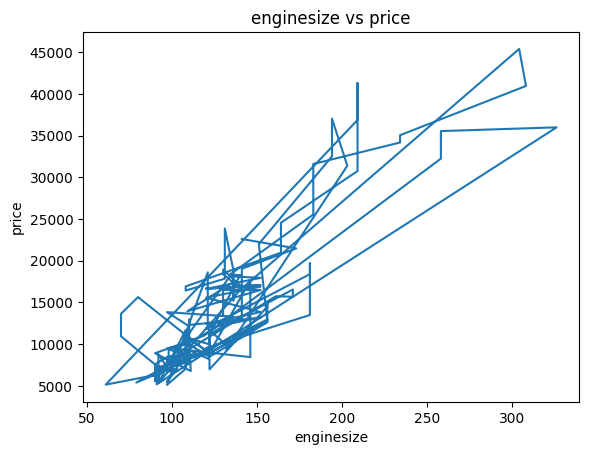

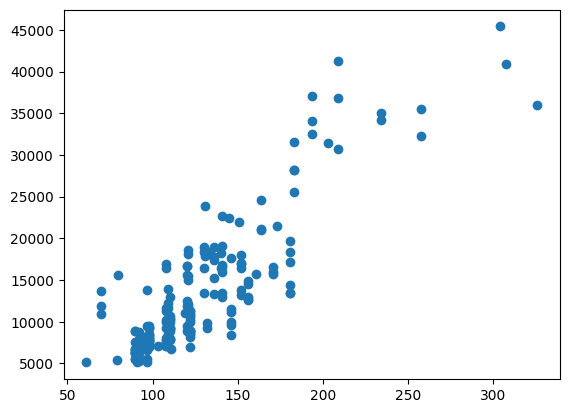

In [48]:
import matplotlib.pyplot as plt
a=train_df['enginesize']
b=train_df['price']
# Basic plot
plt.plot(a, b)
plt.title('enginesize vs price')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

# Scatter plot
plt.scatter(a, b)

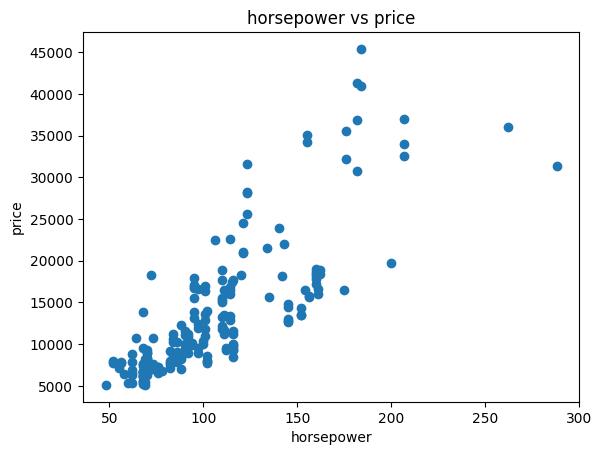

In [49]:
p=train_df['horsepower']
q=train_df['price']
plt.title('horsepower vs price')
plt.xlabel('horsepower')
plt.ylabel('price')


# Scatter plot
plt.scatter(p, q)
plt.show()


In [50]:
X=train_df.drop('price',axis=1)
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,142,0,1,0,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [51]:
y=train_df['price']

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0